In [1]:
import numpy as np

from matplotlib import pyplot as plt

import pickle
plt.rcParams["font.family"] = "Times"
#configure plotting
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.cm as cm


TICK_SIZE = 15
LABEL_SIZE = 18
TITLE_SIZE = 20

In [2]:
def plot_lpd_contour(DATASET, METHOD, CONTOUR_MIN, CONTOUR_MAX):
    plt.cla()

    with open(f"../experiments/contour-plots/experiment_results/{DATASET}_{METHOD}_fold_3.pkl", "rb") as f:
             result = pickle.load(f)
    
    lpd = result['mean_lpd']
    
    SIGMA_GRID_MIN, SIGMA_GRID_MAX, L_GRID_MIN, L_GRID_MAX, GRID_NUM = result["grid_min_max_num"]
    log_l = np.linspace(L_GRID_MIN, L_GRID_MAX, GRID_NUM)
    log_sigma = np.linspace(SIGMA_GRID_MIN, SIGMA_GRID_MAX, GRID_NUM)
    [plot_x, plot_y] = np.meshgrid(log_l, log_sigma)

    levels = np.linspace(CONTOUR_MIN, CONTOUR_MAX, CONTOUR_NUM)
    
    # Get the colormap and set the under and bad colors
    colMap = cm.Blues.reversed()
    #colMap.set_bad(color='blue')
    colMap.set_under(color='black')
    
    contour = plt.contourf(plot_x, plot_y, np.flip(lpd, axis=0), levels=levels,  cmap = colMap, extend = 'min')
    
    dis = 0.2
    
    PAD = 0
    
    if METHOD == 'CVI':
        lml = result['mean_lml']
        lml_ep = result['mean_lml_ep']
        
        x_index, y_index = np.where(lml==np.max(lml))
        x_index, y_index = x_index[0], y_index[0] 
        plt.plot(log_l[y_index], np.flip(log_sigma)[x_index], marker="o", markersize=5, markerfacecolor="black", markeredgecolor="white")
        
        x_index_ep, y_index_ep = np.where(lml_ep==np.max(lml_ep))
        x_index_ep, y_index_ep = x_index_ep[0], y_index_ep[0] 
        plt.plot(log_l[y_index_ep], np.flip(log_sigma)[x_index_ep], marker="*", markersize=5, markerfacecolor="black", markeredgecolor="white")
        
        ax = plt.gca()
        ax._tikzplotlib_anchors = [((log_l[y_index], np.flip(log_sigma)[x_index]), f'{METHOD}_mean_lml_b'), ((log_l[y_index_ep], np.flip(log_sigma)[x_index_ep]), f'{METHOD}_mean_lml_ep_b')]
        
        ax.tick_params(axis="y",direction="in", pad=-PAD)
        ax.tick_params(axis="x",direction="in", pad=-PAD)
        
        plt.text(log_l[y_index]+dis, np.flip(log_sigma)[x_index], '$' +str(round(lpd[x_index][y_index], 3))+'$')
        plt.text(log_l[y_index_ep]+dis, np.flip(log_sigma)[x_index_ep], '$' + str(round(lpd[x_index_ep][y_index_ep], 3))+'$')
        

    else:
        lml = result['mean_lml']
        x_index, y_index = np.where(lml==np.max(lml))
        x_index, y_index = x_index[0], y_index[0] 

        plt.plot(log_l[y_index], np.flip(log_sigma)[x_index], marker="o", markersize=5, markerfacecolor="black", markeredgecolor="white")
        ax = plt.gca()
        
        ax.tick_params(axis="y",direction="in", pad=-PAD)
        ax.tick_params(axis="x",direction="in", pad=-PAD)
    plt.axis('square')
    plt.title(METHOD)
        

In [3]:
def plot_contour(DATASET, METHOD, LML, CONTOUR_MIN, CONTOUR_MAX):
    
    plt.cla()
    
    PAD = 0
    
    with open(f"../experiments/contour-plots/experiment_results/{DATASET}_{METHOD}_fold_3.pkl", "rb") as f:
        result = pickle.load(f)
    
    lml = result[LML]

    
    SIGMA_GRID_MIN, SIGMA_GRID_MAX, L_GRID_MIN, L_GRID_MAX, GRID_NUM = result["grid_min_max_num"]
    log_l = np.linspace(L_GRID_MIN, L_GRID_MAX, GRID_NUM)
    log_sigma = np.linspace(SIGMA_GRID_MIN, SIGMA_GRID_MAX, GRID_NUM)
    [plot_x, plot_y] = np.meshgrid(log_l, log_sigma)

    levels = np.linspace(CONTOUR_MIN, CONTOUR_MAX, CONTOUR_NUM)
    
    # Get the colormap and set the under and bad colors
    colMap = cm.Blues.reversed()
    #colMap.set_bad(color='blue')
    colMap.set_under(color='black')
    
    contour = plt.contourf(plot_x, plot_y, np.flip(lml, axis=0), levels=levels, vmin=CONTOUR_MIN, vmax = CONTOUR_MAX, cmap = colMap, extend = 'min')
    
    
    x_index, y_index = np.where(lml==np.max(lml))
    x_index, y_index = x_index[0], y_index[0]
    if LML == 'mean_lml_ep':
        plt.plot(log_l[y_index], np.flip(log_sigma)[x_index], marker="*", markersize=5, markerfacecolor="black", markeredgecolor="white")
    else:
        plt.plot(log_l[y_index], np.flip(log_sigma)[x_index], marker="o", markersize=5, markerfacecolor="black", markeredgecolor="white")
    ax = plt.gca()
    plt.axis('square')
    ax._tikzplotlib_anchors = [((log_l[y_index], np.flip(log_sigma)[x_index]), f'{METHOD}_{LML}_t')]
    ax.tick_params(axis="y",direction="in", pad=-PAD)
    ax.tick_params(axis="x",direction="in", pad=-PAD)
    
    plt.title(METHOD)


In [4]:
def plot_1d_lml(DATASET, sigma_index):
    
    method_list = ['la', 'cvi', 'ep', 'mcmc']
    
    title_list = ['LA', 'VI', 'Ours', 'EP', 'MCMC']
    
    lml = []
    lpd = []
    
    for METHOD in method_list:
        
        with open(f"../experiments/contour-plots/experiment_results/{DATASET}_{METHOD}_fold_3.pkl", "rb") as f:
            result = pickle.load(f)
            
        if METHOD == 'cvi':
            lml.append(result['mean_lml'])
            lml.append(result['mean_lml_ep'])
            lpd.append(result['mean_lpd'])
        else:
            lml.append(result['mean_lml'])
            lpd.append(result['mean_lpd'])
    
    SIGMA_GRID_MIN, SIGMA_GRID_MAX, L_GRID_MIN, L_GRID_MAX, GRID_NUM = result["grid_min_max_num"]
    log_l = np.linspace(L_GRID_MIN, L_GRID_MAX, GRID_NUM)
    log_sigma = np.linspace(SIGMA_GRID_MIN, SIGMA_GRID_MAX, GRID_NUM)

    fig = plt.figure(figsize = (8, 5))
    
    ax = plt.subplot(1, 1, 1)
    
     
    # Plot maximum with a vertical line 
    minval = -.45
    maxval = -.25
    for i,c,w,ls in zip([4,1,2],[[.7,.7,.7],'C1','C0'],[7,4,4],['solid','dashed','dashed']):
        val = lml[i][sigma_index]
        maxind = np.argmax(val)
        ax.plot([log_l[maxind],log_l[maxind]],[minval,maxval],color=c,linewidth=w,linestyle=ls)
        

    # Plot MCMC baseline
    i = 4
    ax.plot(log_l, lml[i][sigma_index], label = title_list[i],
             color=[.7, .7, .7],linewidth=7)

    # VI solution
    i = 1
    ax.plot(log_l, lml[i][sigma_index], label = 'VI ELBO',
             color='C1',linewidth=4)
    
     # Our solution
    i = 2
    ax.plot(log_l, lml[i][sigma_index], label = title_list[i],
             color='C0',linewidth=4)
    
    
    # Plot options
    plt.legend()
    plt.xlabel(r'$\log \theta$')
    plt.ylabel(r'Marginal likelihood, $\log p(y \mid \theta)$')
    plt.xlim([1,5])
    plt.ylim([minval,maxval])
    
    plt.text(3,minval + 0.05*(maxval-minval),r'Training proxy for ...')    
    
    
    print('log sigma %.4f'%log_sigma[-1-sigma_index])

    
    fig = plt.figure(figsize = (8, 5))
    ax = plt.subplot(1, 1, 1)
    
    # VI solution
    i = 1
    ax.plot(log_l, lpd[i][sigma_index], label = 'VI ELBO',
             color='C1',linewidth=4)
    
    # Plot maximum with a vertical line 
    minval = -.3 #-.7
    maxval = -0.05
    for i,i2,c,w,ls in zip([1,2],[1,1],['C1','C0'],[4,4],['dashed','dashed']):
        val = lml[i][sigma_index]
        val_lpd = lpd[i2][sigma_index]
        maxind = np.argmax(val)
        ax.plot([log_l[maxind],log_l[maxind]],[minval,maxval],color=c,linewidth=w,linestyle=ls)
        ax.plot(log_l[maxind],val_lpd[maxind],color=c,marker='o',markersize=5)

    plt.text(2.9,maxval - 0.1*(maxval-minval),'... test performance on holdout data')    
        
    # Plot options
    plt.legend()
    plt.xlabel(r'Characteristic length-scale, $\log \ell$')
    plt.ylabel(r'Predictive density, $\log p(y_* \mid \theta)$')
    plt.xlim([1,5])
    plt.ylim([minval,maxval])
    

# Fig 1

log sigma 2.3000


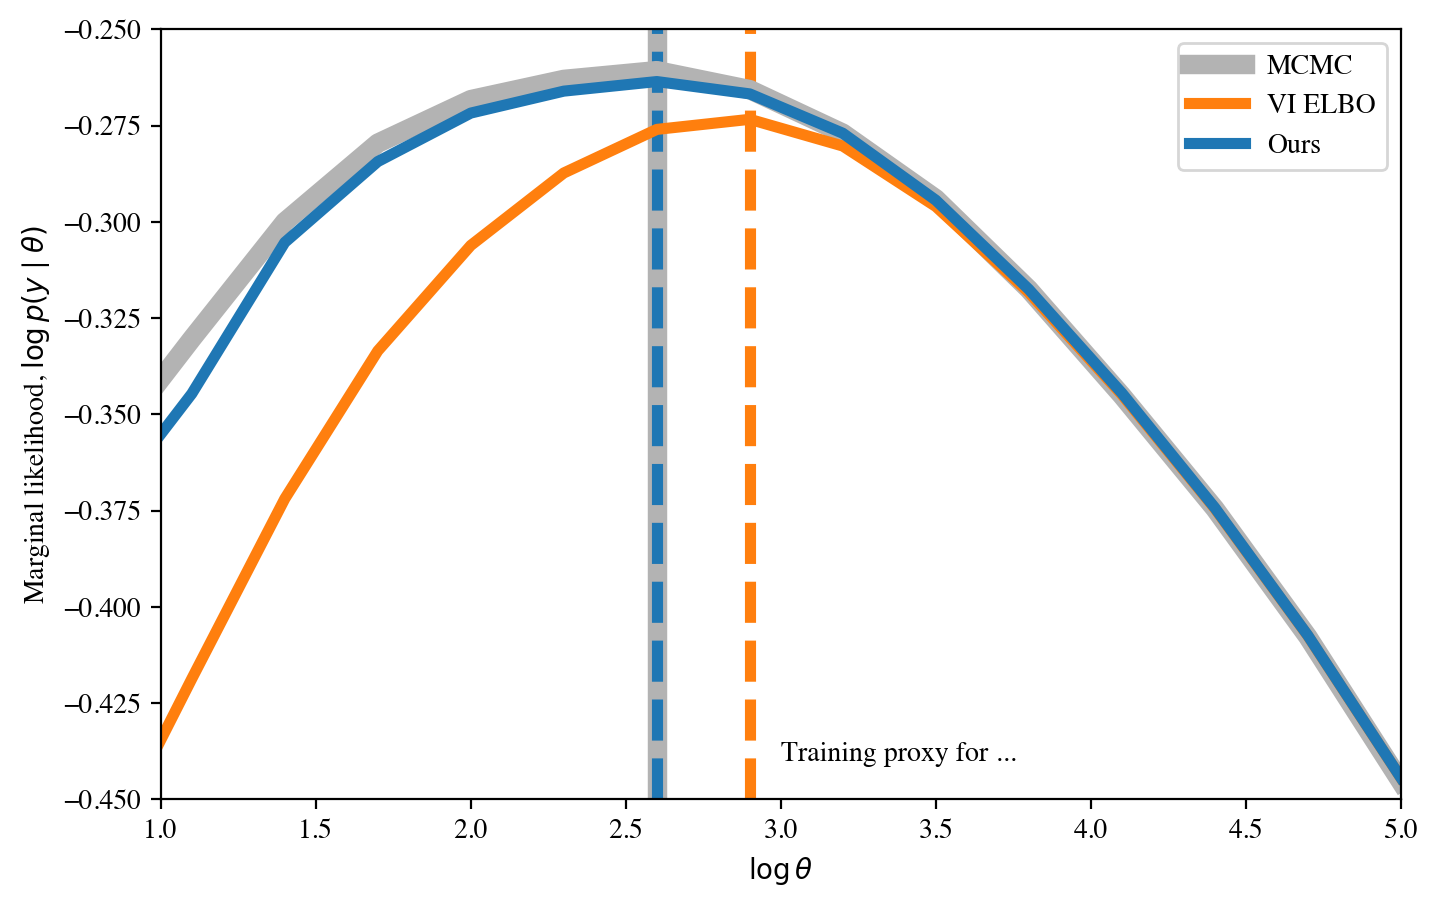

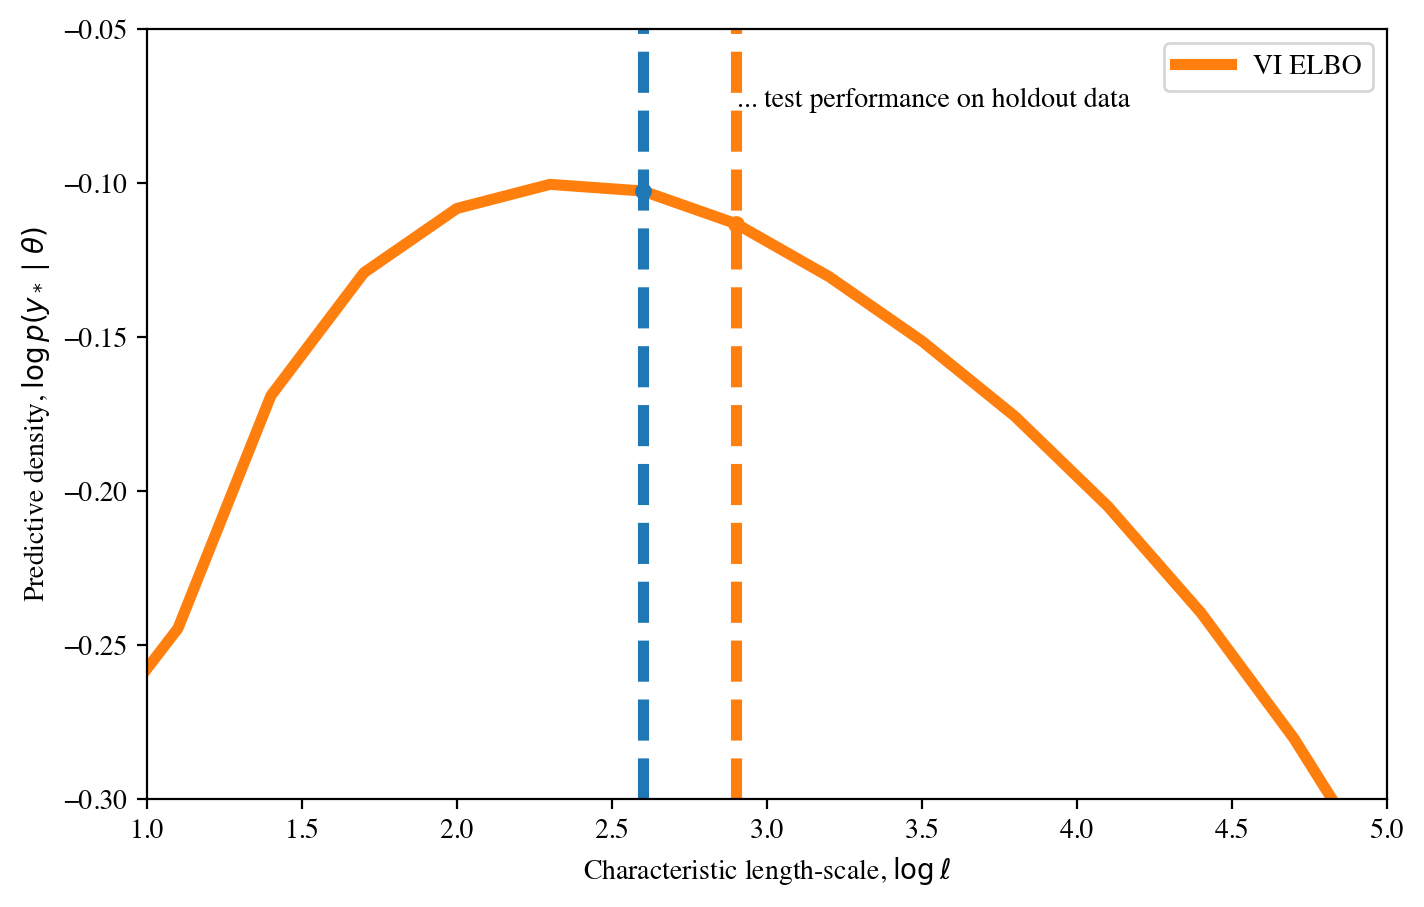

In [5]:
plot_1d_lml('ionosphere', 9)

# Fig 2

## Log marginal likelihood estimation

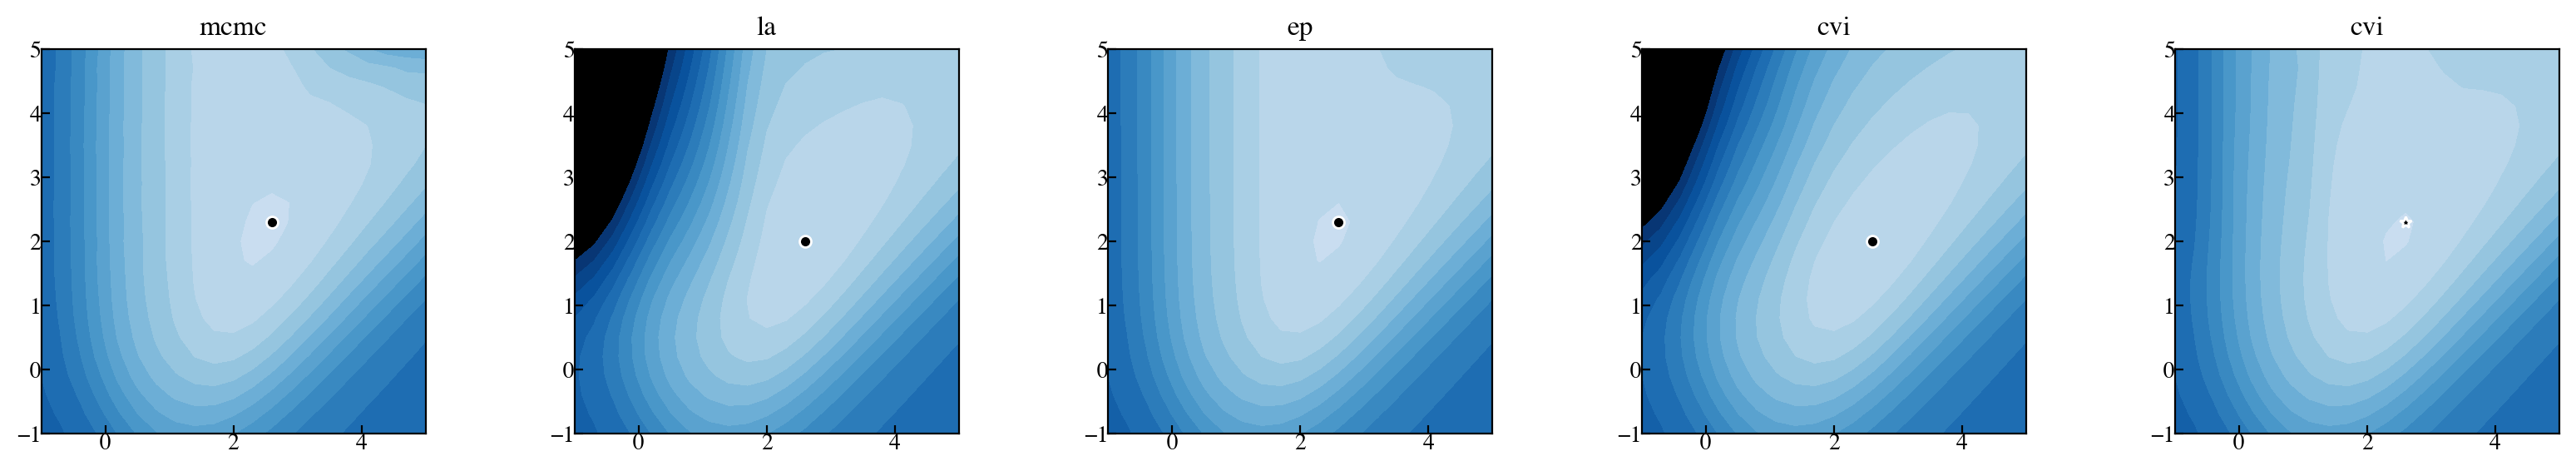

In [6]:
dataset = "ionosphere"

CONTOUR_NUM = 20

with open(f"experiment_results/contour_results/{dataset}_mcmc_fold_3.pkl", "rb") as f:
    mcmc_lml = pickle.load(f)['mean_lml']

contour_min = np.min(mcmc_lml) - 0.15
contour_max = np.max(mcmc_lml) + 0.2

plt.figure(figsize=(20,3))
plt.subplot(1,5,1)
plot_contour(dataset, "mcmc", "mean_lml", contour_min, contour_max)
plt.subplot(1,5,2)
plot_contour(dataset, "la", "mean_lml", contour_min, contour_max)
plt.subplot(1,5,3)
plot_contour(dataset, "ep", "mean_lml", contour_min, contour_max)
plt.subplot(1,5,4)
plot_contour(dataset, "cvi", "mean_lml", contour_min, contour_max)
plt.subplot(1,5,5)
plot_contour(dataset, "cvi", "mean_lml_ep", contour_min, contour_max)


## Log predictive density estimation

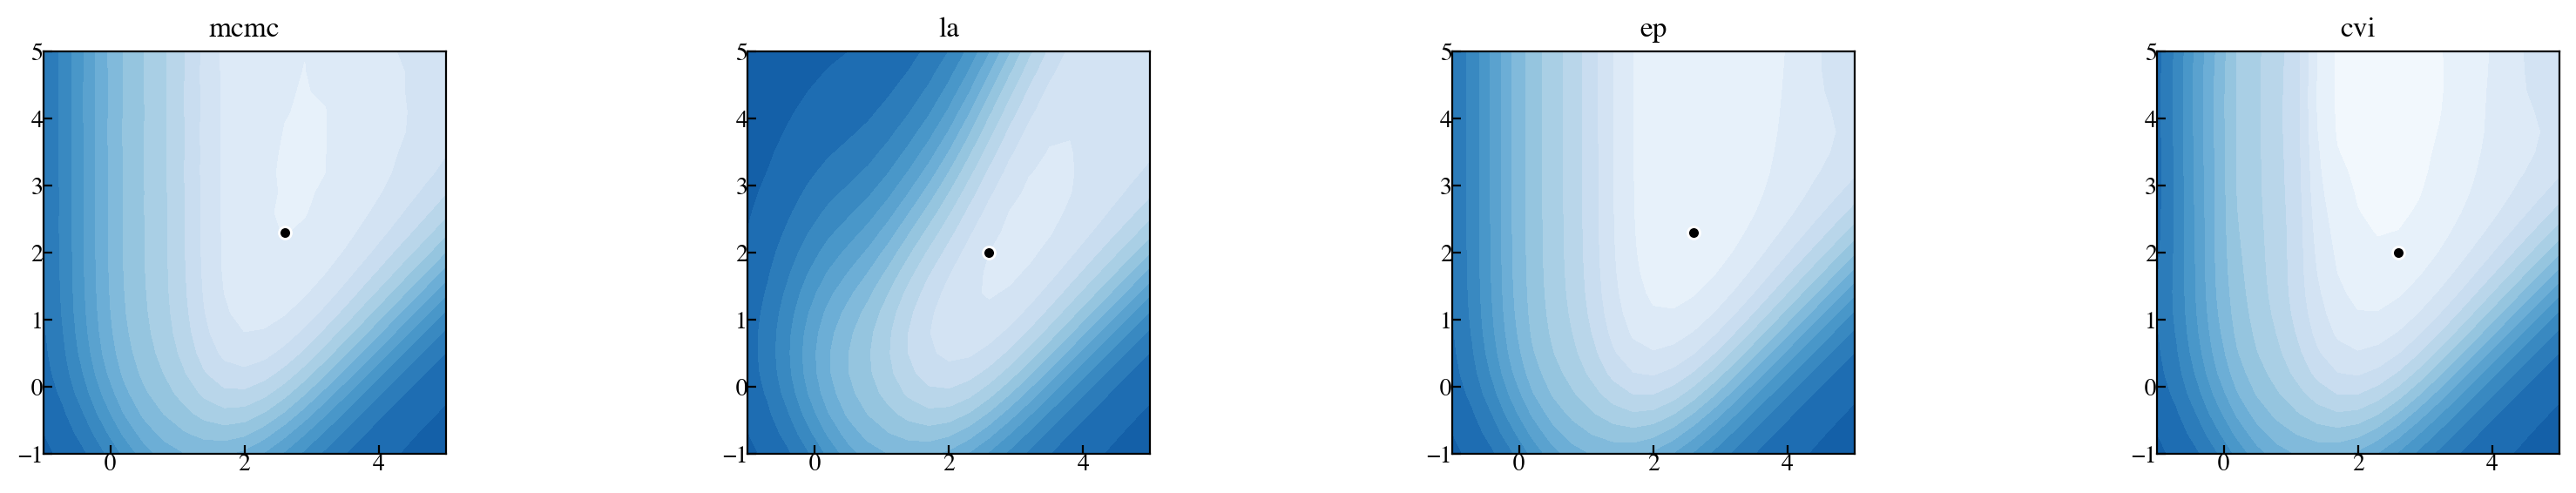

In [7]:
plt.figure(figsize=(20,3))
plt.subplot(1,4,1)
plot_lpd_contour(dataset, "mcmc", contour_min, contour_max)
plt.subplot(1,4,2)
plot_lpd_contour(dataset, "la", contour_min, contour_max)
plt.subplot(1,4,3)
plot_lpd_contour(dataset, "ep", contour_min, contour_max)
plt.subplot(1,4,4)
plot_lpd_contour(dataset, "cvi", contour_min, contour_max)
